# AI Housing Price Predictions
### A comparison of the efficacy of multiple artificial intelligence models in the task of predicting housing price from multiple variables

This lab will walk through how each model is set up and optimized. Metrics for each model will be compared in order to determine which model(s) would be most beneficial in a practical environment. The purpose of this lab is **not** to create a pseudo-state-of-the-art model which can predict prices with great accuracy, but rather to gain insight into which models have the most potential to perform this task. 

In [31]:
# Import needed libraries
import numpy as np
import pandas as pd
from tqdm import tqdm

# Import models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Import functions from other modules for data processing and plotting
from data_processing import *
from plot_helpers import *

In [32]:
# Read data from file and prepare it for use later
original_dataframe = get_data()
original_dataframe

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [41]:
# Change housing prices to be interms of millions of dollars (rounded down)
# This will reduce the number of labels to 13 (prices range from 1 to 13 milliion dollars)
modified_labels_df = original_dataframe.copy()
modified_labels_df['price'] = modified_labels_df['price'].apply(lambda x: int(x // 1e6))

# use a label encoder on the data
label_encoded_data = prepare_data(modified_labels_df)

# Split training and testing data
train_x, train_y, test_x, test_y = preprocess()

# Normalize training data and retrieve scaler
scaler, norm_train_data = normalize(train_x)

# Normalize testing data
norm_test_data = scaler.transform(test_x)

# Normalize entire dataset for pca and other models
data = label_encoded_data.values[:,1:]
labels = label_encoded_data.values[:,0]
scaler = StandardScaler()
normalized_dataset = scaler.fit_transform(data)

label_encoded_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13,7420,4,2,3,1,0,0,0,1,2,1,0
1,12,8960,4,4,4,1,0,0,0,1,3,0,0
2,12,9960,3,2,2,1,0,1,0,0,2,1,1
3,12,7500,4,2,2,1,0,1,0,1,3,1,0
4,11,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1,3000,2,1,1,1,0,1,0,0,2,0,2
541,1,2400,3,1,1,0,0,0,0,0,0,0,1
542,1,3620,2,1,1,1,0,0,0,0,0,0,2
543,1,2910,3,1,1,0,0,0,0,0,0,0,0


# Decision Tree

The decision tree is a very basic ai model and is not expected to result in high metrics for this task. It is being used as a baseline of what the a low performing model for this task may look like in order to be compared to the efficacy of other models.

In [42]:
# Create and fit the decision tree
decision_tree = DecisionTreeClassifier(random_state=150)
decision_tree.fit(norm_train_data, train_y)

# Create a scores dictionary
dt_scores = {'Accuracy': 0, 'Precision': 0, 'Recall': 0}
labels = decision_tree.predict(norm_test_data)

accuracy = accuracy_score(test_y, labels)
precision = precision_score(test_y, labels, average='macro')
recall = recall_score(test_y, labels, average='macro')

dt_scores['Accuracy'] = accuracy
dt_scores['Precision'] = precision
dt_scores['Recall'] = recall

dt_scores

/Users/greenegunnar/opt/anaconda3/envs/CAIenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Accuracy': 0.3394495412844037,
 'Precision': 0.18284467718748612,
 'Recall': 0.2524788451474668}

# FIXME: Write something about the results of the decision tree

# Support Vector Machine

The next model which will be tested is a support vector machine 
FIXME: Write more stuff here

In [43]:
# Create support vector machine
svm = SVC(kernel='poly', random_state=14)

# Train svm
svm.fit(norm_train_data, train_y)

# Predict and get metrics
svm_scores = {'Accuracy': 0, 'Precision': 0, 'Recall': 0}
labels = decision_tree.predict(norm_test_data)

accuracy = accuracy_score(test_y, labels)
precision = precision_score(test_y, labels, average='macro')
recall = recall_score(test_y, labels, average='macro')

svm_scores['Accuracy'] = accuracy
svm_scores['Precision'] = precision
svm_scores['Recall'] = recall

svm_scores

/Users/greenegunnar/opt/anaconda3/envs/CAIenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Accuracy': 0.3394495412844037,
 'Precision': 0.18284467718748612,
 'Recall': 0.2524788451474668}

# Write stuff here about machine

ValueError: 'c' argument has 109 elements, which is inconsistent with 'x' and 'y' with size 545.

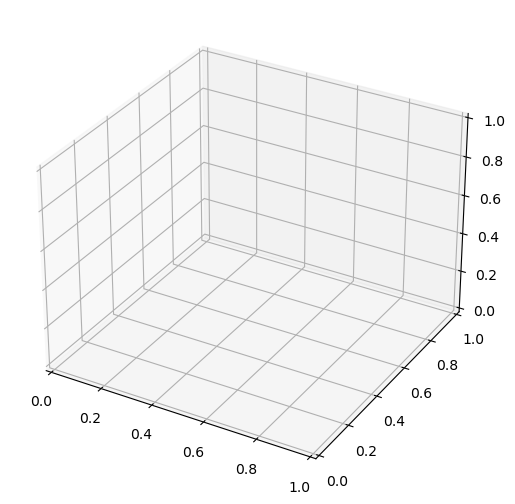

In [44]:
# plot the original dataset

plt = plot_3d(normalized_dataset, labels)

ValueError: 'c' argument has 109 elements, which is inconsistent with 'x' and 'y' with size 436.

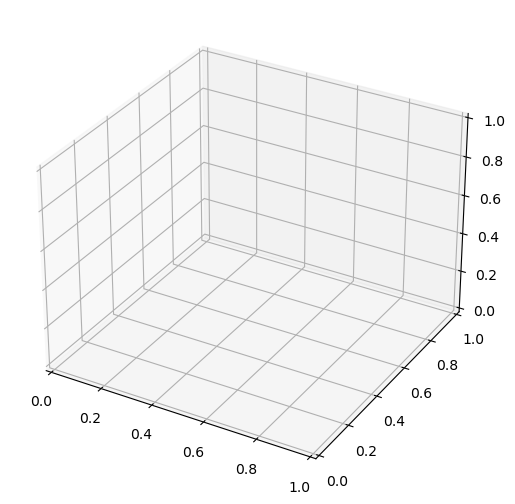

In [46]:
# Create pca model with 12 components
pca = PCA(n_components=12, random_state=57)

# Reduce data with pca model
pca_reduced_data = pca.fit_transform(norm_train_data)

# Plot the reduced data
plt2 = plot_3d(pca_reduced_data, labels)

100%|██████████| 29/29 [00:02<00:00, 12.53it/s]


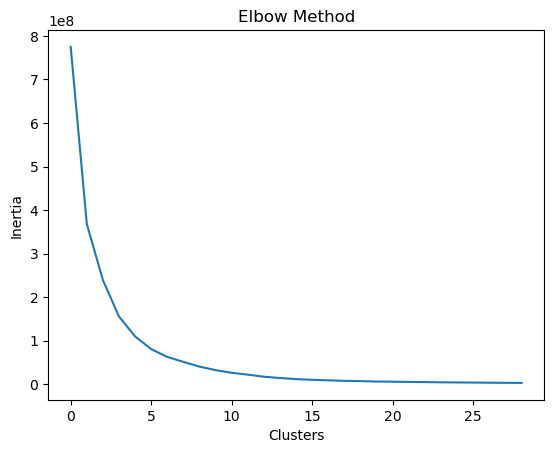

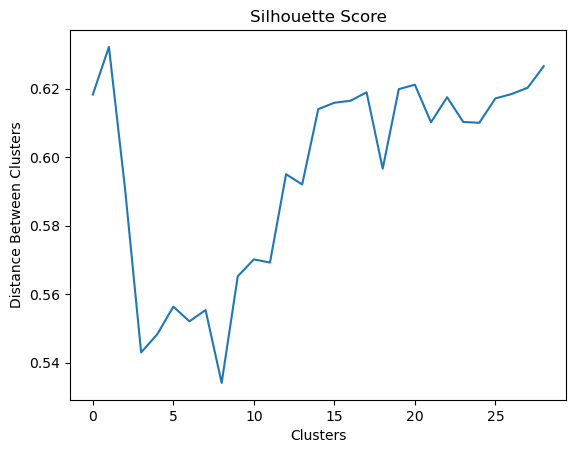

In [47]:
# KMeans
clusters = range(2, 31)

inertia_values = []
km_silhouette_scores = []

for i in tqdm(clusters):
  km = KMeans(n_clusters=i)
  km.fit(train_x)
  inertia_values.append(km.inertia_)
  score = silhouette_score(train_x, km.labels_)
  km_silhouette_scores.append(score)
km_elbow_plot = plot_elbow_method(inertia_values)
km_silhouette_plot = plot_silhouette_method(km_silhouette_scores)

km_elbow_plot.show()
km_silhouette_plot.show()

In [ ]:
num_clusters = 15

kmeans = KMeans(n_clusters=num_clusters)